In [1]:

import matplotlib.pyplot as plt
import numpy as np

import math
import sys
import os

from pathlib import Path

this_dir = str(Path.cwd()) + "/"
sys.path.append(this_dir + '../')

import tvector_pybind, scene_pybind, photon_pybind, phase_pybind, medium_pybind, image_pybind

In [4]:
if 1:
    outFilePrefix = 'cylindrical_us_'

    # default film parameters
    pathLengthMin = 0
    pathLengthMax = 64
    pathLengthBins = 1
    spatialX = 128
    spatialY = 128

    # adhoc parameters
    halfThetaLimit = 0
    emitter_size = 0.002
    sensor_size = 0.002
    emitter_distance = 0.0
    sensor_distance = 0.0

    # default scattering parameters
    sigmaT = 0.0
    albedo = 1.0
    gVal = 0.0


    # default scene parameters
    ior = 1.333
    mediumL = tvector_pybind.Vec3f(-0.015, -5.0, -5.0)
    mediumR = tvector_pybind.Vec3f( 0.015,  5.0,  5.0)

    # default rendering parameters
    numPhotons = 10000000
    maxDepth = -1
    maxPathLength = -1
    useAngularSampling = True

    # default final path importance sampling parameters
    distribution = "none"
    gOrKappa = 4
    emitter_lens_aperture = .015
    emitter_lens_focalLength = .015
    emitter_lens_active = False

    sensor_lens_aperture = .015
    sensor_lens_focalLength = .015
    sensor_lens_active = False

    printInputs = True

    f_u = 5*1e6
    speed_u = 1500
    n_o = 1.3333
    n_max = 0.05e-3
    n_clip = 1
    import matplotlib.pyplot as plt
    import numpy as np

    import math
    import sys
    import os

    from pathlib import Path

    this_dir = str(Path.cwd()) + "/"
    sys.path.append(this_dir + '../')

    import tvector_pybind, scene_pybind, photon_pybind, phase_pybind, medium_pybind, image_pybind
    n_coeff = 1

    phi_min = 1.5708
    phi_max = 1.5708

    mode = 0

    emitter_gap = .0
    sensor_gap = .0
    er_stepsize = 1e-3
    precision = 4
    directTol = 1e-5
    useInitializationHack = True
    rrWeight = 1e-2

    useBounceDecomposition = True
    projectorTexture = "/home/apedired/Dropbox/AccoustoOptics+InvRendering/CodeEtc/SkeletalRenderer/ercrdr/renderer/images/White.pfm"

    threads = -1
    printInputs = False 
    # WIP to read defaults from a file
    # read in custom parameters, if any
    #print('Reading custom parameters...')
    custom_params_f = open(this_dir + '/cylindrical_us.txt')
    for line in custom_params_f:
        #print('\t%s' %(line.strip()))
        param, value = line.strip().split('=')
        if value == '': continue
        if param == 'threads': threads = int(value)
        elif param == 'precision': precision = int(value)
        elif param == 'numPhotons': numPhotons = int(value)
        elif param == 'outFilePrefix': outFilePrefix = value
        elif param == 'sigmaT': sigmaT = float(value)
        elif param == 'albedo': albedo = float(value)
        elif param == 'gVal': gVal = float(value)
        elif param == 'f_u': f_u = float(value)
        elif param == 'speed_u': speed_u = float(value)
        elif param == 'n_o': n_o = float(value)
        elif param == 'n_max': n_max = float(value)
        elif param == 'n_clip': n_clip = float(value)
        elif param == 'phi_min': phi_min = float(value)
        elif param == 'phi_max': phi_max = float(value)
        elif param == 'mode': mode = int(value)
        elif param == 'er_stepsize': er_stepsize = float(value)
        elif param == 'directTol': directTol = float(value)
        elif param == 'rrWeight': rrWeight = float(value)
        elif param == 'projectorTexture': projectorTexture = value
        elif param == 'useDirect': useDirect = (value == 'True')
        elif param == 'useAngularSampling': useAngularSampling = (value == 'True')
        elif param == 'useBounceDecomposition': useBounceDecomposition = (value == 'True')
        elif param == 'maxDepth': maxDepth = int(value)
        elif param == 'maxPathlength': maxPathlength = float(value)
        elif param == 'pathLengthMin': pathLengthMin = float(value)
        elif param == 'pathLengthMax': pathLengthMax = float(value)
        elif param == 'pathLengthBins': pathLengthBins = int(value)
        elif param == 'spatialX': spatialX = int(value)
        elif param == 'spatialY': spatialY = int(value)
        elif param == 'mediumLx': mediumLx = float(value)
        elif param == 'mediumRx': mediumRx = float(value)
        elif param == 'distribution': distribution = value
        elif param == 'gOrKappa': gOrKappa = float(value)
        elif param == 'halfThetaLimit': halfThetaLimit = float(value)
        elif param == 'emitter_gap': emitter_gap = float(value)
        elif param == 'sensor_gap': sensor_gap = float(value)
        elif param == 'emitter_size': emitter_size = float(value)
        elif param == 'emitter_distance': emitter_distance = float(value)
        elif param == 'emitter_lens_aperture': emitter_lens_aperture = float(value)
        elif param == 'emitter_lens_focalLength': emitter_lens_focalLength = float(value)
        elif param == 'emitter_lens_active': emitter_lens_active = (value == 'True')
        elif param == 'sensor_size': sensor_size = float(value)
        elif param == 'sensor_distance': sensor_distance = float(value)
        elif param == 'sensor_lens_aperture': sensor_lens_aperture = float(value)
        elif param == 'sensor_lens_focalLength': sensor_lens_focalLength = float(value)
        elif param == 'sensor_lens_active': sensor_lens_active = (value == 'True')
        elif param == 'useInitializationHack': useInitializationHack = (value == 'True')
        elif param == 'printInputs': printInputs = value
        else: print('\tError: \'%s\' is not a valid parameter' %param)

    if printInputs:
        print('threads:' + str(threads))
        print('precision:' + str(precision))
        print('numPhotons:' + str(numPhotons))
        print('outFilePrefix:' + str(outFilePrefix))
        print('sigmaT:' + str(sigmaT))
        print('albedo:' + str(albedo))
        print('gVal:' + str(gVal))
        print('f_u:' + str(f_u))
        print('speed_u:' + str(speed_u))
        print('n_o:' + str(n_o))
        print('n_max:' + str(n_max))
        print('n_clip:' + str(n_clip))
        print('phi_min:' + str(phi_min))
        print('phi_max:' + str(phi_max))
        print('er_stepsize:' + str(er_stepsize))
        print('directTol:' + str(directTol))
        print('rrWeight:' + str(rrWeight))
        print('projectorTexture:' + str(projectorTexture))
        print('useDirect:' + str(useDirect))
        print('useAngularSampling:' + str(useAngularSampling))
        print('useBounceDecomposition:' + str(useBounceDecomposition))
        print('maxDepth:' + str(maxDepth))
        print('maxPathlength:' + str(maxPathlength))
        print('pathLengthMin:' + str(pathLengthMin))
        print('pathLengthMax:' + str(pathLengthMax))
        print('pathLengthBins:' + str(pathLengthBins))
        print('spatialX:' + str(spatialX))
        print('spatialY:' + str(spatialY))
        print('mediumLx:' + str(mediumLx))
        print('mediumRx:' + str(mediumRx))
        print('distribution:' + str(distribution))
        print('gOrKappa:' + str(gOrKappa))
        print('halfThetaLimit:' + str(halfThetaLimit))
        print('emitter_gap:' + str(emitter_gap))
        print('sensor_gap:' + str(sensor_gap))
        print('emitter_size:' + str(emitter_size))
        print('emitter_distance:' + str(emitter_distance))
        print('emitter_lens_aperture:' + str(emitter_lens_aperture))
        print('emitter_lens_focalLength:' + str(emitter_lens_focalLength))
        print('emitter_lens_active:' + str(emitter_lens_active))
        print('sensor_size:' + str(sensor_size))
        print('sensor_distance:' + str(sensor_distance))
        print('sensor_lens_aperture:' + str(sensor_lens_aperture))
        print('sensor_lens_focalLength:' + str(sensor_lens_focalLength))
        print('sensor_lens_active:' + str(sensor_lens_active))
        print('useInitializationHack:' + str(useInitializationHack))

threads:-1
precision:4
numPhotons:1000000
outFilePrefix:withsplines
sigmaT:0.0
albedo:0.9
gVal:0.9
f_u:898100.0
speed_u:1500.0
n_o:1.3333
n_max:0.0278
n_clip:1.0
phi_min:1.5708
phi_max:1.5708
er_stepsize:0.001
directTol:1e-06
rrWeight:0.001
projectorTexture:../../images/Disk_501.pfm
useDirect:True
useAngularSampling:True
useBounceDecomposition:False
maxDepth:-1
maxPathlength:100000.0
pathLengthMin:0.0
pathLengthMax:100000.0
pathLengthBins:1
spatialX:1024
spatialY:1024
mediumLx:-0.015
mediumRx:0.015
distribution:none
gOrKappa:1.0
halfThetaLimit:0.0
emitter_gap:0.0
sensor_gap:0.0
emitter_size:0.0005
emitter_distance:0.0
emitter_lens_aperture:0.3
emitter_lens_focalLength:0.3
emitter_lens_active:False
sensor_size:0.005
sensor_distance:0.0
sensor_lens_aperture:0.3
sensor_lens_focalLength:0.3
sensor_lens_active:False
useInitializationHack:False


In [5]:
phase = phase_pybind.henyey_greenstein(gVal)

emitter_lens_origin = tvector_pybind.Vec3f(mediumR.index(0), 0.0, 0.0)
EgapEndLocX = emitter_lens_origin.index(0) - emitter_gap
sensor_lens_origin = tvector_pybind.Vec3f(mediumL.index(0), 0.0, 0.0)
SgapBeginLocX = sensor_lens_origin.index(0) + sensor_gap 

# initialize source parameters
lightOrigin = tvector_pybind.Vec3f(mediumR.index(0) + emitter_distance, 0.0, 0.0)
lightAngle = math.pi
lightDir = tvector_pybind.Vec3f(math.cos(lightAngle), math.sin(lightAngle), 0.0)
lightPlane = tvector_pybind.Vec2f(emitter_size, emitter_size)
Li = 75000.0

# initialize camera parameters
viewOrigin = tvector_pybind.Vec3f(mediumL.index(0)-sensor_distance, 0.0, 0.0)
viewDir = tvector_pybind.Vec3f(-1.0, 0.0, 0.0)
viewX = tvector_pybind.Vec3f(0.0, -1.0, 0.0)
viewPlane = tvector_pybind.Vec2f(emitter_size, emitter_size)
pathlengthRange = tvector_pybind.Vec2f(pathLengthMin, pathLengthMax)
     
viewReso = tvector_pybind.Vec3i(spatialX, spatialY, pathLengthBins)

# initialize rendering parameters.
axis_uz = tvector_pybind.Vec3f(-1.0, 0.0, 0.0) 
axis_ux = tvector_pybind.Vec3f(0.0, 0.0, 1.0) 
p_u = tvector_pybind.Vec3f(0.0, 0.0, 0.0) 

In [6]:
medium = medium_pybind.Medium(sigmaT, albedo, phase)
n_max = 0.0278
# set up everything
print('Setting up scene...')
scene = scene_pybind.Scene(
    ior,
    mediumL,
    mediumR,
    lightOrigin,
    lightDir,
    halfThetaLimit,
    projectorTexture,
    lightPlane,
    Li,
    viewOrigin,
    viewDir,
    viewX,
    viewPlane,
    pathlengthRange,
    useBounceDecomposition,
    distribution,
    gOrKappa,
    emitter_lens_origin,
    emitter_lens_aperture,
    emitter_lens_focalLength,
    emitter_lens_active,
    sensor_lens_origin,
    sensor_lens_aperture,
    sensor_lens_focalLength,
    sensor_lens_active,
    f_u,
    speed_u,
    n_o,
    n_max,
    n_clip,
    phi_min,
    phi_max,
    mode,
    axis_uz,
    axis_ux,
    p_u,
    er_stepsize,
    directTol,
    rrWeight, 
    precision, 
    EgapEndLocX, 
    SgapBeginLocX, 
    useInitializationHack
)
print('done')
renderer = photon_pybind.Renderer(
    maxDepth, maxPathLength, useDirect, useAngularSampling, threads
)

img = image_pybind.SmallImage(
    viewReso.x,
    viewReso.y,
    viewReso.z
)

Setting up scene...
done


In [7]:
%%time
numPhotons = 1000000
print('Rendering image...')
renderer.renderImage(img, medium, scene, numPhotons)
print('Rendering completed.')


Rendering image...
Rendering completed.
CPU times: user 15.7 s, sys: 124 ms, total: 15.8 s
Wall time: 675 ms


In [8]:
%%time
# Adi: very slow and painful way to convert image to numpy array. Need to fix this
(xres, yres, zres) = (img.getXRes(), img.getYRes(), img.getZRes())
pixels = []
for x in range(xres):
    for y in range(yres):
        for z in range(zres):
            pixels.append(img.getPixel(x, y, z))

img_arr = np.array(pixels)
img_arr = img_arr.reshape((xres, yres, zres))

CPU times: user 511 ms, sys: 11.7 ms, total: 523 ms
Wall time: 522 ms


/home/apedired/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/apedired/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


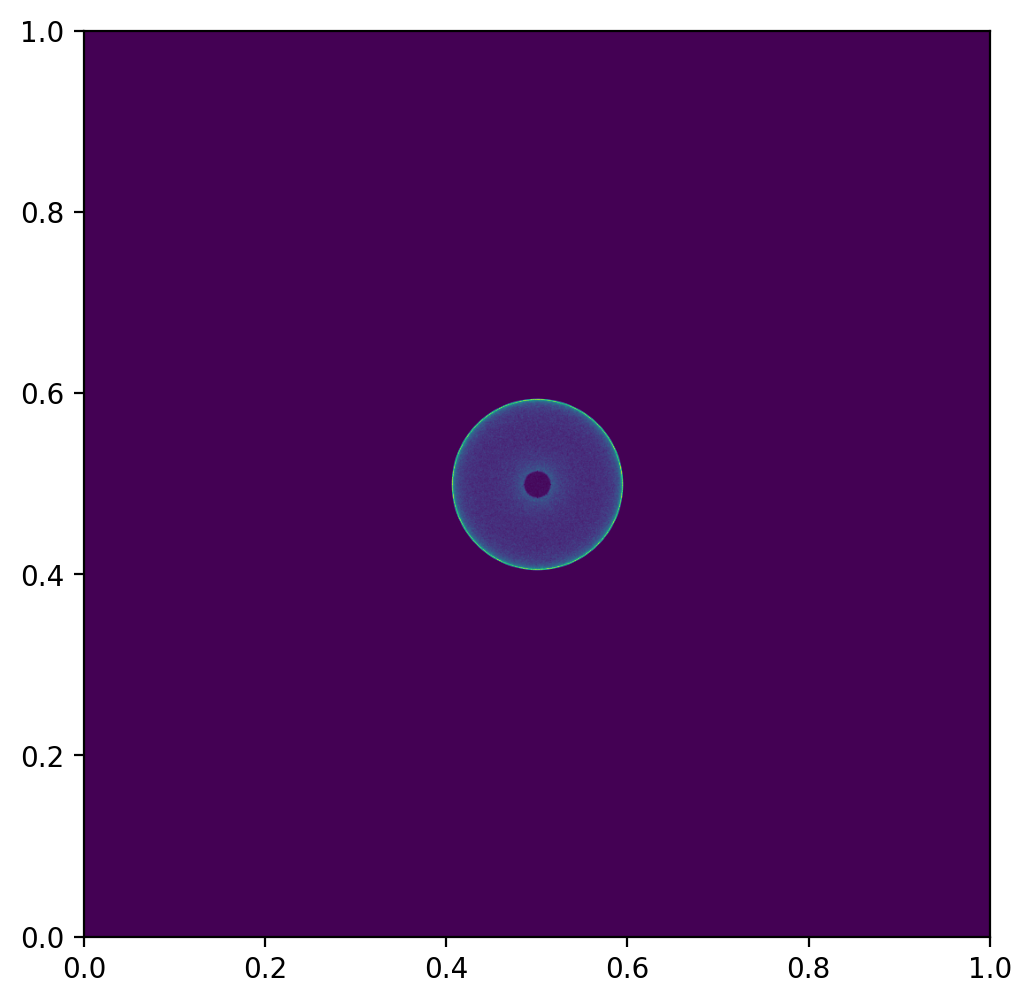

In [9]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=200)
plt.imshow(img_arr,extent=[0, 1, 0, 1])
plt.show()
